In [4]:
import sklearn.datasets

data = sklearn.datasets.load_diabetes()

df_X=data.data
df_y=data.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [7]:
import numpy as np

df_X = np.array(df_X)
print(df_X)
df_y = np.array(df_y)
print(df_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [12]:
# 모델 정의 및 파라미터 초기화
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [13]:
# 손실함수 정의
def MSE(a, b):
  mse = ((a - b) ** 2).mean() 
  return mse

def loss(x, w, b, y):
  predictions = model(x, w, b)
  L = MSE(predictions, y)
  return L

In [14]:
# Gradient 기울기 계산 함수
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [16]:
# 경사 하강법을 위한 러닝레이트 설정
LEARNING_RATE = 0.1

In [17]:
# 경사하강법으로 로스를 줄이며 학습하기 
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6256.1203
Iteration 20 : Loss 5913.0258
Iteration 30 : Loss 5836.2915
Iteration 40 : Loss 5764.8841
Iteration 50 : Loss 5695.7178
Iteration 60 : Loss 5628.6831
Iteration 70 : Loss 5563.7074
Iteration 80 : Loss 5500.7210
Iteration 90 : Loss 5439.6566
Iteration 100 : Loss 5380.4494
Iteration 110 : Loss 5323.0367
Iteration 120 : Loss 5267.3581
Iteration 130 : Loss 5213.3552
Iteration 140 : Loss 5160.9717
Iteration 150 : Loss 5110.1534
Iteration 160 : Loss 5060.8476
Iteration 170 : Loss 5013.0039
Iteration 180 : Loss 4966.5733
Iteration 190 : Loss 4921.5087
Iteration 200 : Loss 4877.7645
Iteration 210 : Loss 4835.2968
Iteration 220 : Loss 4794.0633
Iteration 230 : Loss 4754.0229
Iteration 240 : Loss 4715.1361
Iteration 250 : Loss 4677.3648
Iteration 260 : Loss 4640.6722
Iteration 270 : Loss 4605.0227
Iteration 280 : Loss 4570.3819
Iteration 290 : Loss 4536.7168
Iteration 300 : Loss 4503.9954
Iteration 310 : Loss 4472.1867
Iteration 320 : Loss 4441.2610
Iteration 330 : L

Iteration 2820 : Loss 2992.4722
Iteration 2830 : Loss 2991.6627
Iteration 2840 : Loss 2990.8606
Iteration 2850 : Loss 2990.0660
Iteration 2860 : Loss 2989.2789
Iteration 2870 : Loss 2988.4990
Iteration 2880 : Loss 2987.7263
Iteration 2890 : Loss 2986.9609
Iteration 2900 : Loss 2986.2025
Iteration 2910 : Loss 2985.4511
Iteration 2920 : Loss 2984.7067
Iteration 2930 : Loss 2983.9692
Iteration 2940 : Loss 2983.2385
Iteration 2950 : Loss 2982.5145
Iteration 2960 : Loss 2981.7972
Iteration 2970 : Loss 2981.0866
Iteration 2980 : Loss 2980.3825
Iteration 2990 : Loss 2979.6848
Iteration 3000 : Loss 2978.9936
Iteration 3010 : Loss 2978.3087
Iteration 3020 : Loss 2977.6301
Iteration 3030 : Loss 2976.9578
Iteration 3040 : Loss 2976.2916
Iteration 3050 : Loss 2975.6315
Iteration 3060 : Loss 2974.9775
Iteration 3070 : Loss 2974.3294
Iteration 3080 : Loss 2973.6873
Iteration 3090 : Loss 2973.0510
Iteration 3100 : Loss 2972.4206
Iteration 3110 : Loss 2971.7959
Iteration 3120 : Loss 2971.1769
Iteratio

Iteration 6650 : Loss 2903.1873
Iteration 6660 : Loss 2903.1514
Iteration 6670 : Loss 2903.1157
Iteration 6680 : Loss 2903.0803
Iteration 6690 : Loss 2903.0451
Iteration 6700 : Loss 2903.0102
Iteration 6710 : Loss 2902.9755
Iteration 6720 : Loss 2902.9410
Iteration 6730 : Loss 2902.9068
Iteration 6740 : Loss 2902.8728
Iteration 6750 : Loss 2902.8390
Iteration 6760 : Loss 2902.8054
Iteration 6770 : Loss 2902.7721
Iteration 6780 : Loss 2902.7390
Iteration 6790 : Loss 2902.7061
Iteration 6800 : Loss 2902.6735
Iteration 6810 : Loss 2902.6410
Iteration 6820 : Loss 2902.6088
Iteration 6830 : Loss 2902.5768
Iteration 6840 : Loss 2902.5450
Iteration 6850 : Loss 2902.5134
Iteration 6860 : Loss 2902.4820
Iteration 6870 : Loss 2902.4508
Iteration 6880 : Loss 2902.4199
Iteration 6890 : Loss 2902.3891
Iteration 6900 : Loss 2902.3585
Iteration 6910 : Loss 2902.3282
Iteration 6920 : Loss 2902.2980
Iteration 6930 : Loss 2902.2681
Iteration 6940 : Loss 2902.2383
Iteration 6950 : Loss 2902.2087
Iteratio

In [22]:
# Test 성능 확인
mse = loss(X_test, W, b, y_test)
mse

2880.3155063807353

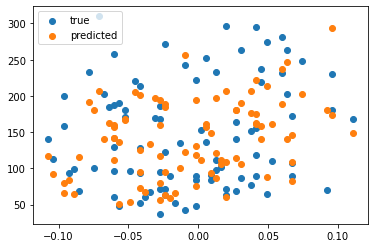

In [39]:
# 정답과 예측 데이터 함께 시각화 하기
prediction = model(X_test, W, b)

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="predicted")
plt.legend()
plt.show()